In [1]:
# Importing the required libraries
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from fancyimpute import KNN
import random
import re
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
from scipy import stats
from statsmodels.tsa.stattools import acf, pacf
import warnings

sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', 380)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 380)
%matplotlib inline

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Choosing Working Directory
os.chdir(r"C:\Users\Krishna\Google Drive\Data Science\Project\Edwisor\Project 1")
os.getcwd()

'C:\\Users\\Krishna\\Google Drive\\Data Science\\Project\\Edwisor\\Project 1'

In [3]:
# Import the data
data_original = pd.read_excel("Absenteeism_at_work_Project.xls")
data = data_original.copy()


In [4]:
data.head(8)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0


In [5]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

In [6]:
data.rename(columns={'Work load Average/day ':'Work load Average per day'}, inplace = True)

In [7]:
data.columns = data.columns.str.replace(" ", "_")

In [8]:
data['Absenteeism_time_in_hours'].unique()

array([  4.,   0.,   2.,  nan,   8.,  40.,   1.,   7.,   3.,  32.,   5.,
        16.,  24.,  64.,  56.,  80., 120., 112., 104.,  48.])

There are employees with zero hours of absence so we will remove them

In [9]:
data = data.loc[data['Absenteeism_time_in_hours'] != 0,:]

In [10]:
data.shape

(704, 21)

In [11]:
data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Transportation_expense',
       'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target', 'Disciplinary_failure',
       'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index', 'Absenteeism_time_in_hours'],
      dtype='object')

In [12]:
categorical_col = ['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons', 'Disciplinary_failure',
                  'Education', 'Social_drinker', 'Social_smoker']
categorical_col

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Social_drinker',
 'Social_smoker']

In [13]:
continuous_col = data.columns.drop(categorical_col).tolist()
continuous_col

['Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average_per_day',
 'Hit_target',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

In [14]:
continuous_col_wo_target = continuous_col[0:11]
print(continuous_col_wo_target)

['Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target', 'Son', 'Pet', 'Weight', 'Height', 'Body_mass_index']


In [15]:
continuous_data = data.loc[:,continuous_col_wo_target]
continuous_data.head()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index
0,289.0,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.0
2,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,89.0,170.0,31.0
3,279.0,5.0,14.0,39.0,239554.0,97.0,2.0,0.0,68.0,168.0,24.0
4,289.0,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.0
5,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,89.0,170.0,31.0


In [16]:
categorical_data = data.loc[:,categorical_col]
categorical_data.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker
0,11,26.0,7.0,3,1,0.0,1.0,1.0,0.0
2,3,23.0,7.0,4,1,0.0,1.0,1.0,0.0
3,7,7.0,7.0,5,1,0.0,1.0,1.0,1.0
4,11,23.0,7.0,5,1,0.0,1.0,1.0,0.0
5,3,23.0,7.0,6,1,0.0,1.0,1.0,0.0


In [17]:
target_data = pd.DataFrame(data['Absenteeism_time_in_hours'])
target_data.head()

,Absenteeism_time_in_hours
0,4.0
2,2.0
3,4.0
4,2.0
5,NaN


# Missing Value Analysis

In [18]:
# Creating dataframe of columns with missing values and its count
missing_val = pd.DataFrame(data.isna().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index':'Variable', 0:'Sum of missing values'})
missing_val = missing_val.sort_values("Sum of missing values", ascending=False)
print(missing_val)

                           Variable  Sum of missing values
19                  Body_mass_index                     29
20        Absenteeism_time_in_hours                     22
18                           Height                     13
9         Work_load_Average_per_day                     10
12                        Education                     10
5            Transportation_expense                      7
13                              Son                      6
11             Disciplinary_failure                      6
10                       Hit_target                      6
15                    Social_smoker                      4
8                               Age                      3
1                Reason_for_absence                      3
7                      Service_time                      3
6   Distance_from_Residence_to_Work                      3
14                   Social_drinker                      3
16                              Pet                     

<BarContainer object of 21 artists>

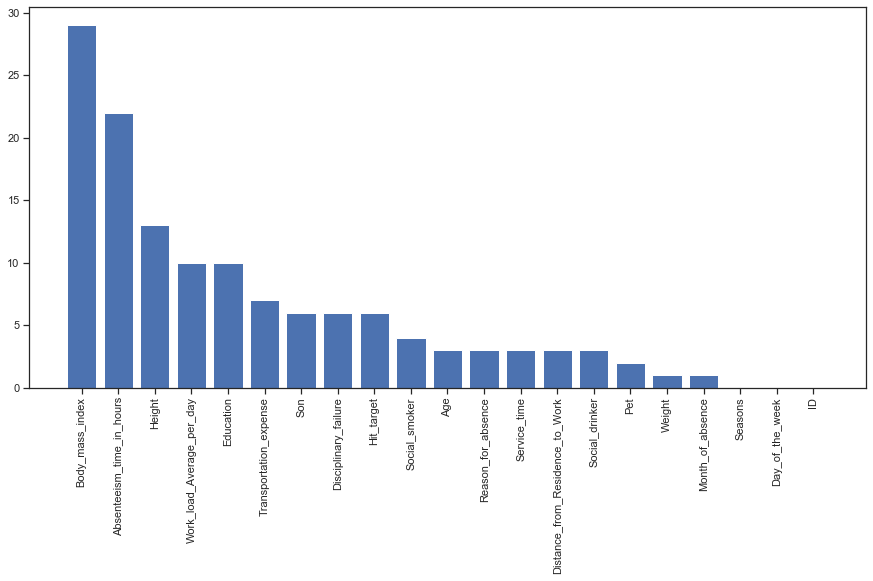

In [19]:
plt.figure(figsize=(15,7))
plt.xticks(rotation='vertical')
plt.bar(missing_val['Variable'], missing_val['Sum of missing values'])

In [20]:

continuous_data = pd.DataFrame(KNN(k=3).fit_transform(continuous_data), columns = continuous_data.columns)

Imputing row 1/704 with 0 missing, elapsed time: 0.079
Imputing row 101/704 with 1 missing, elapsed time: 0.080
Imputing row 201/704 with 0 missing, elapsed time: 0.081
Imputing row 301/704 with 0 missing, elapsed time: 0.082
Imputing row 401/704 with 0 missing, elapsed time: 0.082
Imputing row 501/704 with 0 missing, elapsed time: 0.082
Imputing row 601/704 with 0 missing, elapsed time: 0.083
Imputing row 701/704 with 0 missing, elapsed time: 0.083


In [21]:
continuous_data.isna().sum()

Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_per_day          0
Hit_target                         0
Son                                0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
dtype: int64

In [22]:
categorical_data.isna().sum()

ID                       0
Reason_for_absence       3
Month_of_absence         1
Day_of_the_week          0
Seasons                  0
Disciplinary_failure     6
Education               10
Social_drinker           3
Social_smoker            4
dtype: int64

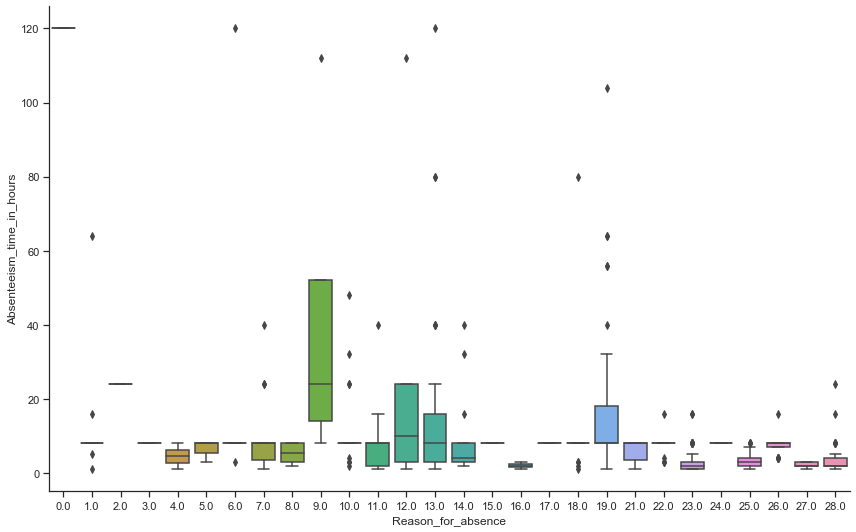

In [23]:
sns.catplot(x='Reason_for_absence', y="Absenteeism_time_in_hours", kind="box", data=data,height=7.5,aspect=12/7.5)

In [24]:
# Imputing categorical data

# Missing value in Reason for absence will be replaces with Reason for absence with least absence hour. i.e Reason 27 as it is less than 10
categorical_data.loc[categorical_data['Reason_for_absence'].isnull(),'Reason_for_absence'] = 27

In [25]:
a = pd.Series(data["Reason_for_absence"])
a.value_counts()

23.0    149
28.0    110
27.0     68
13.0     55
19.0     40
22.0     37
26.0     33
25.0     31
11.0     26
10.0     25
18.0     21
14.0     19
1.0      16
7.0      15
12.0      8
6.0       8
0.0       8
21.0      6
8.0       6
9.0       4
5.0       3
24.0      3
16.0      3
15.0      2
4.0       2
17.0      1
2.0       1
3.0       1
Name: Reason_for_absence, dtype: int64

We have zero category in Reason of absence, So it will be replaced with 26 i.e unjustified absence

In [26]:
categorical_data.loc[categorical_data['Reason_for_absence']==0,'Reason_for_absence'] = 26

In [27]:
categorical_data.loc[categorical_data['Month_of_absence'].isnull(),'Month_of_absence'] = 10

In [28]:
categorical_data.loc[categorical_data["Disciplinary_failure"].isnull(),'Disciplinary_failure'] = 0 

In [29]:
for i in [11,10,34,14,24]:
    categorical_data.loc[(categorical_data['Education'].isnull()) & (categorical_data['ID']==i),'Education'] = categorical_data.loc[categorical_data['ID']==i,'Education'].mode()[0]

In [30]:
for i in [10,14,17]:
    categorical_data.loc[(categorical_data['Social_drinker'].isnull()) & (categorical_data['ID']==i),'Social_drinker'] = categorical_data.loc[categorical_data['ID']==i,'Social_drinker'].mode()[0]

In [31]:
for i in [34,1,11,15]:
    categorical_data.loc[(categorical_data['Social_smoker'].isnull()) & (categorical_data['ID']==i),'Social_smoker'] = categorical_data.loc[categorical_data['ID']==i,'Social_smoker'].mode()[0]

In [32]:
target_data["Reason_for_absence"] = categorical_data["Reason_for_absence"]
type(target_data)

pandas.core.frame.DataFrame

In [33]:
target_data.head(5)

,Absenteeism_time_in_hours,Reason_for_absence
0,4.0,26.0
2,2.0,23.0
3,4.0,7.0
4,2.0,23.0
5,NaN,23.0


In [34]:
for i in [23,14,10,22,26,6,28,11,13]:
    target_data.loc[(target_data["Absenteeism_time_in_hours"].isnull()) & (target_data['Reason_for_absence']==i),'Absenteeism_time_in_hours'] = target_data.loc[target_data['Reason_for_absence']==i,'Absenteeism_time_in_hours'].median()

In [35]:
target_data = target_data.drop(columns = ['Reason_for_absence'])


In [36]:
target_data

,Absenteeism_time_in_hours
0,4.0
2,2.0
3,4.0
4,2.0
5,2.0
6,8.0
7,4.0
8,40.0
9,8.0
10,8.0


In [37]:
categorical_data.isna().sum()

ID                      0
Reason_for_absence      0
Month_of_absence        0
Day_of_the_week         0
Seasons                 0
Disciplinary_failure    0
Education               0
Social_drinker          0
Social_smoker           0
dtype: int64

In [38]:
for i in categorical_col:
    data[i] = pd.Categorical(data[i])
  
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 736
Data columns (total 21 columns):
ID                                 704 non-null category
Reason_for_absence                 701 non-null category
Month_of_absence                   703 non-null category
Day_of_the_week                    704 non-null category
Seasons                            704 non-null category
Transportation_expense             697 non-null float64
Distance_from_Residence_to_Work    701 non-null float64
Service_time                       701 non-null float64
Age                                701 non-null float64
Work_load_Average_per_day          694 non-null float64
Hit_target                         698 non-null float64
Disciplinary_failure               698 non-null category
Education                          694 non-null category
Son                                698 non-null float64
Social_drinker                     701 non-null category
Social_smoker                      700 non-null

In [39]:
datamv = pd.concat([continuous_data, categorical_data], axis=1, join='inner')


In [40]:
datamv = pd.concat([datamv, target_data], axis=1, join='inner')

In [41]:
datamv.head(20)

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker,Absenteeism_time_in_hours
0,289.000000,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.000000,11,26.0,7.0,3,1,0.0,1.0,1.0,0.0,4.0
2,279.000000,5.0,14.0,39.0,239554.0,97.0,2.0,0.0,68.0,168.0,24.000000,3,23.0,7.0,4,1,0.0,1.0,1.0,0.0,2.0
3,289.000000,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.000000,7,7.0,7.0,5,1,0.0,1.0,1.0,1.0,4.0
4,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,89.0,170.0,31.000000,11,23.0,7.0,5,1,0.0,1.0,1.0,0.0,2.0
5,361.000001,52.0,3.0,28.0,239554.0,97.0,1.0,4.0,80.0,172.0,27.000000,3,23.0,7.0,6,1,0.0,1.0,1.0,0.0,2.0
6,260.000000,50.0,11.0,36.0,239554.0,97.0,4.0,0.0,65.0,168.0,23.000000,10,22.0,7.0,6,1,0.0,1.0,1.0,0.0,8.0
7,155.000000,12.0,14.0,34.0,239554.0,97.0,2.0,0.0,95.0,196.0,25.000000,20,23.0,7.0,6,1,0.0,1.0,1.0,0.0,4.0
8,235.000000,11.0,14.0,37.0,239554.0,97.0,1.0,1.0,88.0,172.0,29.000000,14,19.0,7.0,2,1,0.0,1.0,1.0,0.0,40.0
9,260.000000,50.0,11.0,36.0,239554.0,97.0,4.0,0.0,65.0,168.0,23.000000,1,22.0,7.0,2,1,0.0,3.0,0.0,0.0,8.0
10,260.000000,50.0,11.0,36.0,239554.0,97.0,4.0,0.0,65.0,168.0,23.000000,20,1.0,7.0,2,1,0.0,1.0,1.0,0.0,8.0


In [42]:
data = datamv.copy()


In [43]:
data.head(20)

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker,Absenteeism_time_in_hours
0,289.000000,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.000000,11,26.0,7.0,3,1,0.0,1.0,1.0,0.0,4.0
2,279.000000,5.0,14.0,39.0,239554.0,97.0,2.0,0.0,68.0,168.0,24.000000,3,23.0,7.0,4,1,0.0,1.0,1.0,0.0,2.0
3,289.000000,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.000000,7,7.0,7.0,5,1,0.0,1.0,1.0,1.0,4.0
4,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,89.0,170.0,31.000000,11,23.0,7.0,5,1,0.0,1.0,1.0,0.0,2.0
5,361.000001,52.0,3.0,28.0,239554.0,97.0,1.0,4.0,80.0,172.0,27.000000,3,23.0,7.0,6,1,0.0,1.0,1.0,0.0,2.0
6,260.000000,50.0,11.0,36.0,239554.0,97.0,4.0,0.0,65.0,168.0,23.000000,10,22.0,7.0,6,1,0.0,1.0,1.0,0.0,8.0
7,155.000000,12.0,14.0,34.0,239554.0,97.0,2.0,0.0,95.0,196.0,25.000000,20,23.0,7.0,6,1,0.0,1.0,1.0,0.0,4.0
8,235.000000,11.0,14.0,37.0,239554.0,97.0,1.0,1.0,88.0,172.0,29.000000,14,19.0,7.0,2,1,0.0,1.0,1.0,0.0,40.0
9,260.000000,50.0,11.0,36.0,239554.0,97.0,4.0,0.0,65.0,168.0,23.000000,1,22.0,7.0,2,1,0.0,3.0,0.0,0.0,8.0
10,260.000000,50.0,11.0,36.0,239554.0,97.0,4.0,0.0,65.0,168.0,23.000000,20,1.0,7.0,2,1,0.0,1.0,1.0,0.0,8.0


# Outlier Analysis
Boxplot to check for Outliers

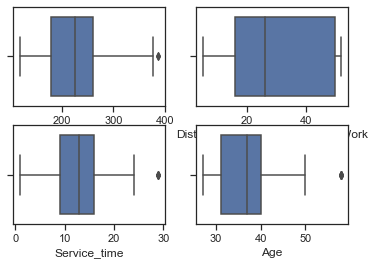

In [44]:
plt.figure(1)

plt.subplot(221)
sns.boxplot(data["Transportation_expense"])

plt.subplot(222)
sns.boxplot(data["Distance_from_Residence_to_Work"])

plt.subplot(223)
sns.boxplot(data["Service_time"])

plt.subplot(224)
sns.boxplot(data["Age"])

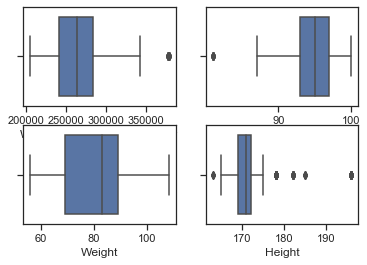

In [45]:
plt.figure(0)

plt.subplot(221)
sns.boxplot(data["Work_load_Average_per_day"])

plt.subplot(222)
sns.boxplot(data["Hit_target"])

plt.subplot(223)
sns.boxplot(data["Weight"])

plt.subplot(224)
sns.boxplot(data["Height"])

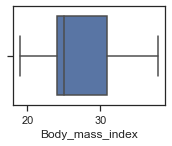

In [46]:
plt.subplot(221)
sns.boxplot(data["Body_mass_index"])

In [47]:
# Storing columns names of columns with outliers
col_out = ["Transportation_expense", "Service_time", "Age", "Work_load_Average_per_day",
           "Son", "Pet", "Hit_target", "Height"]
print(col_out)

['Transportation_expense', 'Service_time', 'Age', 'Work_load_Average_per_day', 'Son', 'Pet', 'Hit_target', 'Height']


In [48]:
# Replacing Outliers with nan

for col in col_out:
    q75, q25 = np.percentile(data.loc[:,col], [75,25])
    iqr = q75 - q25
    
    minimum = q25 - (iqr * 1.5)
    maximum = q75 + (iqr * 1.5)
    
    data.loc[data.loc[:,col] < minimum, col] = minimum
    data.loc[data.loc[:,col] > maximum, col] = maximum
    


In [49]:
# Data types have been changed
# Converting the data type to categorical 
#for i in categorical_col:
#    data[i] = pd.Categorical(data[i])
  
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 703
Data columns (total 21 columns):
Transportation_expense             673 non-null float64
Distance_from_Residence_to_Work    673 non-null float64
Service_time                       673 non-null float64
Age                                673 non-null float64
Work_load_Average_per_day          673 non-null float64
Hit_target                         673 non-null float64
Son                                673 non-null float64
Pet                                673 non-null float64
Weight                             673 non-null float64
Height                             673 non-null float64
Body_mass_index                    673 non-null float64
ID                                 673 non-null int64
Reason_for_absence                 673 non-null float64
Month_of_absence                   673 non-null float64
Day_of_the_week                    673 non-null int64
Seasons                            673 non-null int64
Disci

In [50]:
data_clean = data.copy()

In [51]:
data.head()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker,Absenteeism_time_in_hours
0,289.000000,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.0,11,26.0,7.0,3,1,0.0,1.0,1.0,0.0,4.0
2,279.000000,5.0,14.0,39.0,239554.0,97.0,2.0,0.0,68.0,168.0,24.0,3,23.0,7.0,4,1,0.0,1.0,1.0,0.0,2.0
3,289.000000,36.0,13.0,33.0,239554.0,97.0,2.0,1.0,90.0,172.0,30.0,7,7.0,7.0,5,1,0.0,1.0,1.0,1.0,4.0
4,179.000000,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,89.0,170.0,31.0,11,23.0,7.0,5,1,0.0,1.0,1.0,0.0,2.0
5,361.000001,52.0,3.0,28.0,239554.0,97.0,1.0,2.5,80.0,172.0,27.0,3,23.0,7.0,6,1,0.0,1.0,1.0,0.0,2.0


# EDA

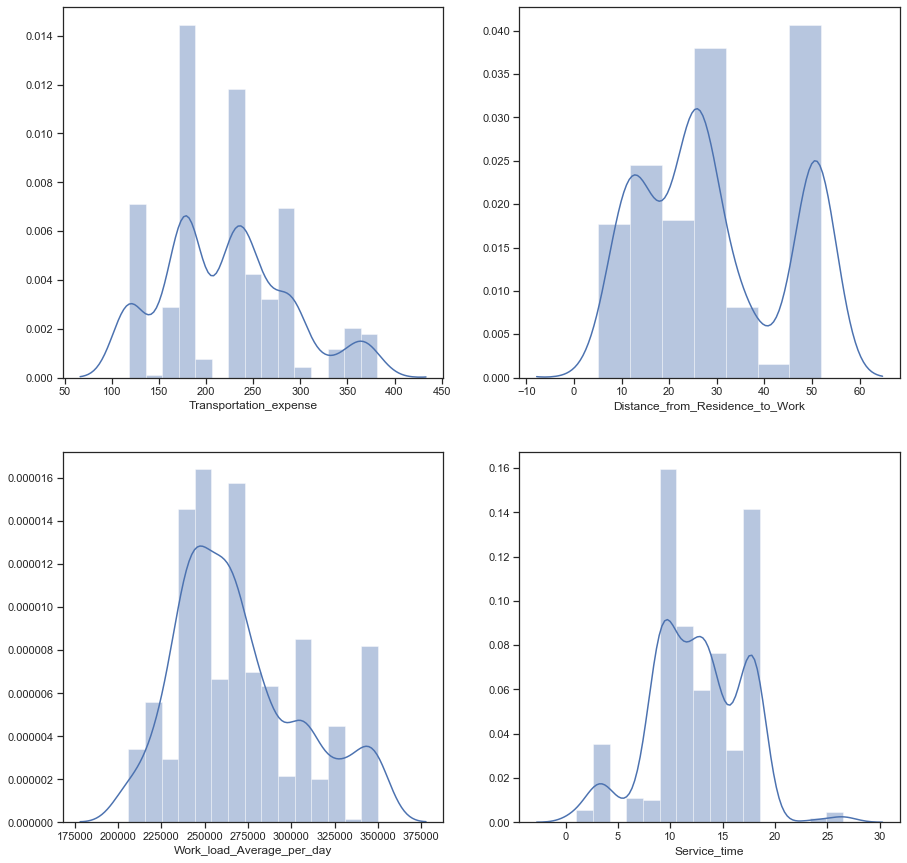

In [52]:
# Checking distribution
# Continuous Variables
plt.figure(figsize=(15,15))
plt.figure(1)
plt.subplot(221)
sns.distplot(data['Transportation_expense'].dropna())

plt.subplot(222)
sns.distplot(data['Distance_from_Residence_to_Work'].dropna())

plt.subplot(223)
sns.distplot(data['Work_load_Average_per_day'].dropna())

plt.subplot(224)
sns.distplot(data['Service_time'].dropna())


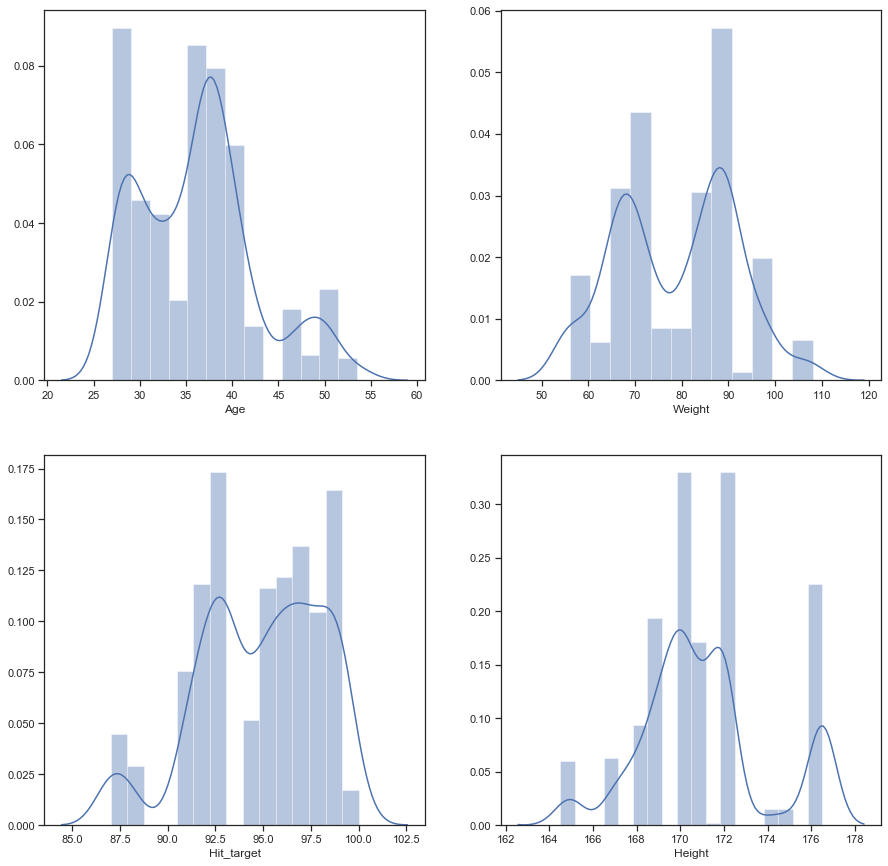

In [53]:
plt.figure(figsize=(15,15))
plt.figure(1)
plt.subplot(221)
sns.distplot(data['Age'].dropna())

plt.subplot(222)
sns.distplot(data['Weight'].dropna())

plt.subplot(223)
sns.distplot(data['Hit_target'].dropna())

plt.subplot(224)
sns.distplot(data['Height'].dropna())


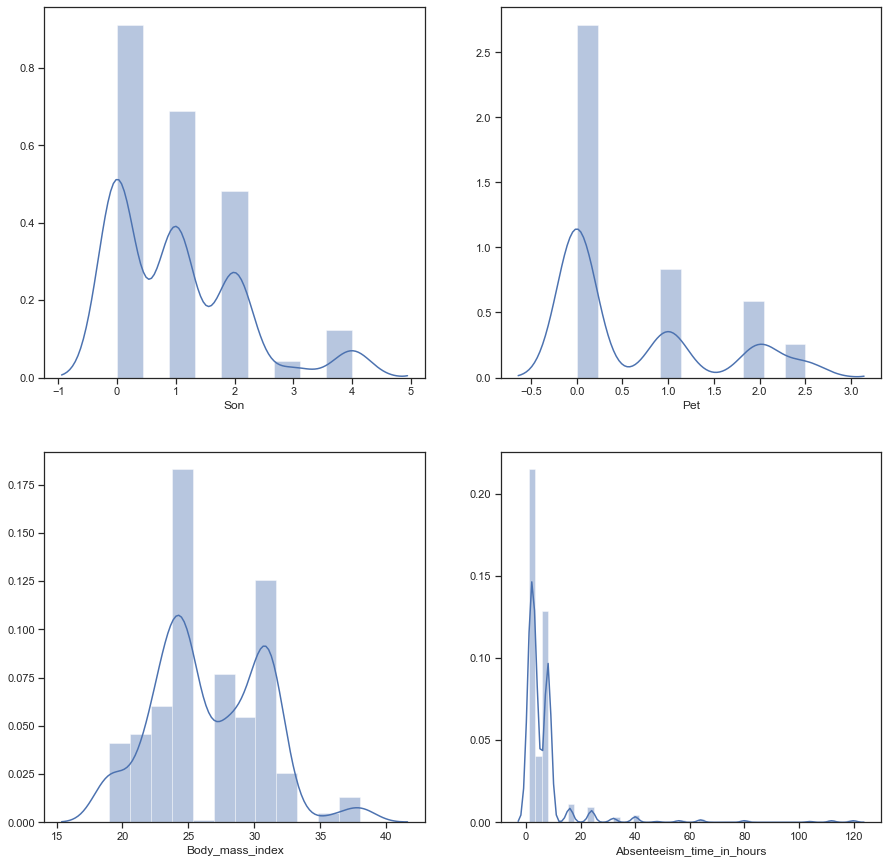

In [54]:
plt.figure(figsize=(15,15))
plt.figure(1)
plt.subplot(221)
sns.distplot(data['Son'].dropna())
plt.subplot(222)
sns.distplot(data['Pet'].dropna())
plt.subplot(223)
sns.distplot(data['Body_mass_index'].dropna())
plt.subplot(224)
sns.distplot(data['Absenteeism_time_in_hours'].dropna())

In [55]:
# Value counts
for i in data.columns:
    print(i,'-',len(data[i].value_counts()))

Transportation_expense - 28
Distance_from_Residence_to_Work - 25
Service_time - 18
Age - 23
Work_load_Average_per_day - 46
Hit_target - 17
Son - 7
Pet - 5
Weight - 26
Height - 19
Body_mass_index - 31
ID - 33
Reason_for_absence - 27
Month_of_absence - 12
Day_of_the_week - 5
Seasons - 4
Disciplinary_failure - 2
Education - 4
Social_drinker - 2
Social_smoker - 2
Absenteeism_time_in_hours - 18


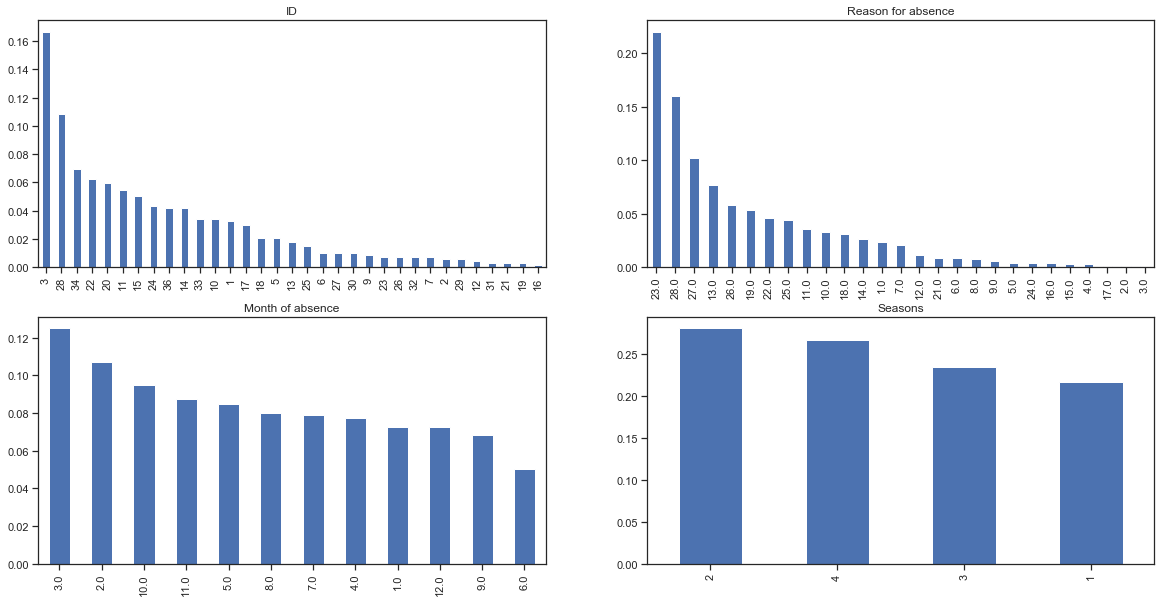

In [56]:
plt.figure(1)
plt.subplot(221)
data['ID'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'ID')

plt.subplot(222)
data['Reason_for_absence'].value_counts(normalize=True).plot.bar(title= 'Reason for absence')

plt.subplot(223)
data['Month_of_absence'].value_counts(normalize=True).plot.bar(title= 'Month of absence')

plt.subplot(224)
data['Seasons'].value_counts(normalize=True).plot.bar(title= 'Seasons')

plt.show()

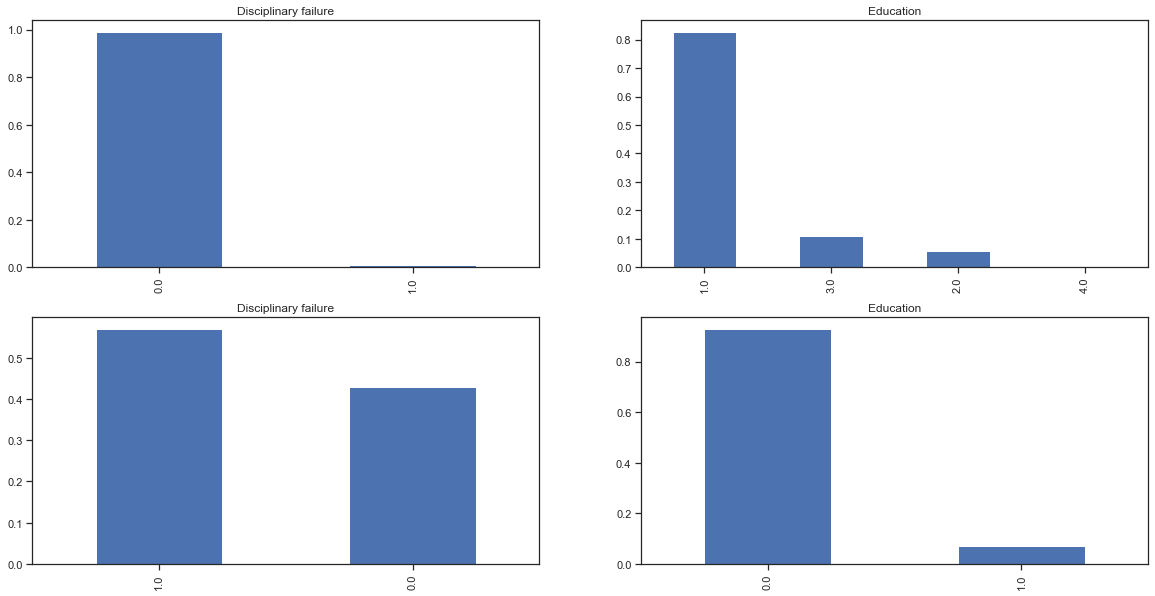

In [57]:
plt.figure(1)
plt.subplot(221)
data['Disciplinary_failure'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Disciplinary failure')

plt.subplot(222)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(223)
data['Social_drinker'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Disciplinary failure')

plt.subplot(224)
data['Social_smoker'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

# Checking relationship of continuous variable with target variable

In [58]:
data.loc[:,continuous_col].corr()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1.000000,0.280300,-0.357850,-0.237164,-0.031523,-0.075962,0.386245,0.475691,-0.198657,-0.159195,-0.125303,-0.039732
Distance_from_Residence_to_Work,0.280300,1.000000,0.123317,-0.143323,-0.086390,-0.003017,0.040045,0.128672,-0.033563,-0.343057,0.137563,-0.012700
Service_time,-0.357850,0.123317,1.000000,0.692887,0.022545,0.008041,-0.044184,-0.408119,0.459570,-0.078465,0.503808,-0.021530
Age,-0.237164,-0.143323,0.692887,1.000000,-0.037017,-0.020994,0.057573,-0.308303,0.431596,0.012695,0.487120,0.000395
Work_load_Average_per_day,-0.031523,-0.086390,0.022545,-0.037017,1.000000,-0.051643,0.050329,0.026118,-0.032831,0.044898,-0.098630,0.043467
Hit_target,-0.075962,-0.003017,0.008041,-0.020994,-0.051643,1.000000,-0.027164,-0.037124,-0.009066,0.069347,-0.045440,0.023089
Son,0.386245,0.040045,-0.044184,0.057573,0.050329,-0.027164,1.000000,0.154880,-0.133556,-0.186886,-0.153169,0.050526
Pet,0.475691,0.128672,-0.408119,-0.308303,0.026118,-0.037124,0.154880,1.000000,-0.128276,-0.148720,-0.077189,-0.027941
Weight,-0.198657,-0.033563,0.459570,0.431596,-0.032831,-0.009066,-0.133556,-0.128276,1.000000,0.287843,0.896922,0.002446
Height,-0.159195,-0.343057,-0.078465,0.012695,0.044898,0.069347,-0.186886,-0.148720,0.287843,1.000000,-0.088588,0.000603


[]

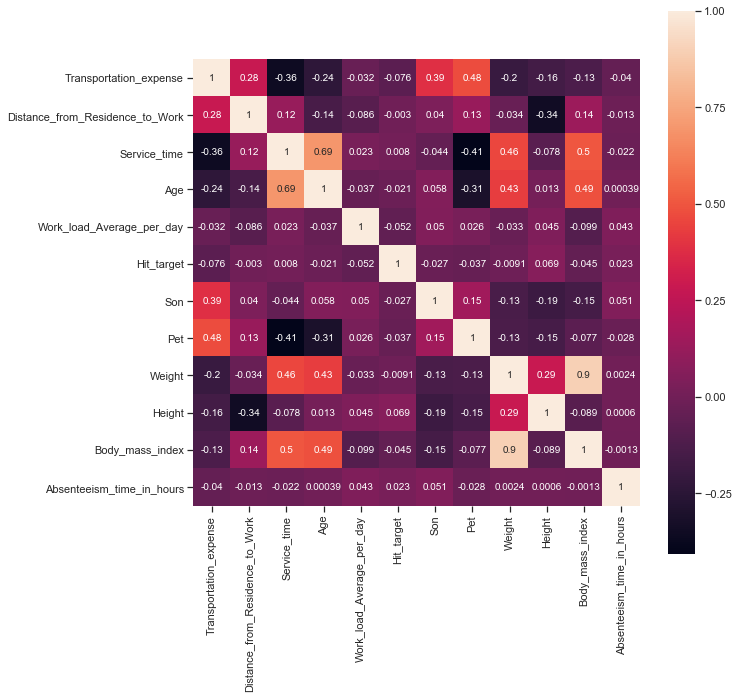

In [59]:

# Set the width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

# Generate correlation matrix
corr = data.loc[:, continuous_col].corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),
           square=True, ax=ax, annot=True)

plt.plot()

From correlation table and plot above we can say that independent continuous variables has weak relationship with the target variable. Because Correlation of every continuous variable with target varaible is less than 0.2

# Checking relationship of categorical variable with target variable

In [60]:
categorical_col

['ID',
 'Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Social_drinker',
 'Social_smoker']

<BarContainer object of 673 artists>

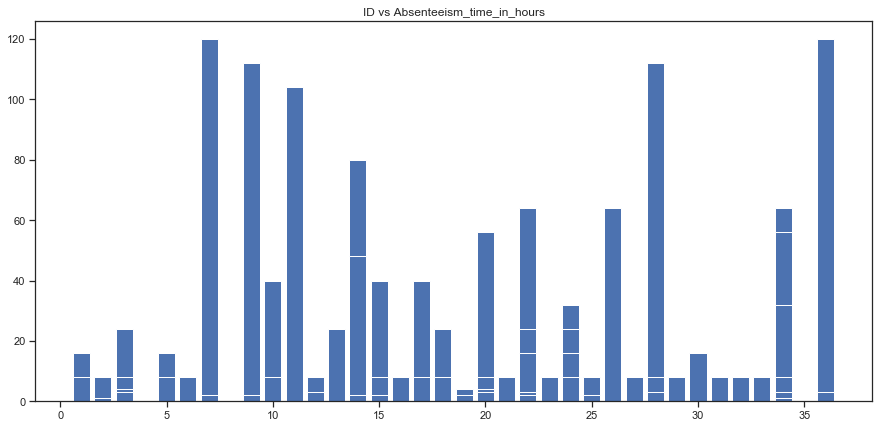

In [61]:
plt.figure(figsize=(15,7))
plt.title('ID vs Absenteeism_time_in_hours')
plt.bar(data['ID'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

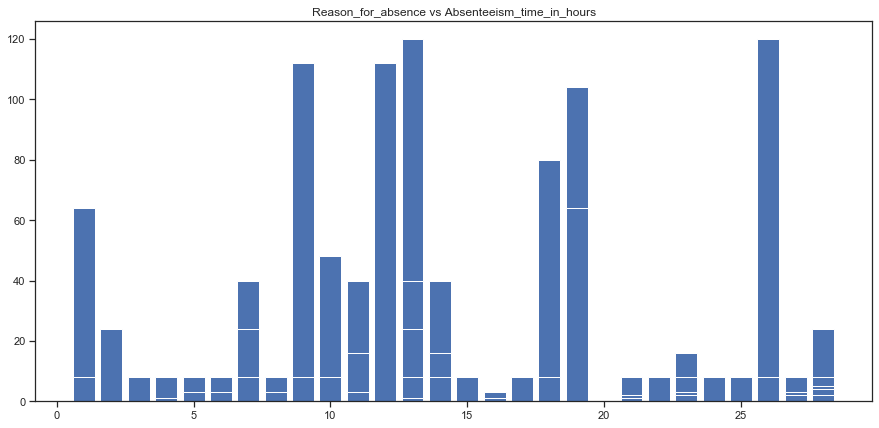

In [62]:
plt.figure(figsize=(15,7))
plt.title('Reason_for_absence vs Absenteeism_time_in_hours')
plt.bar(data['Reason_for_absence'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

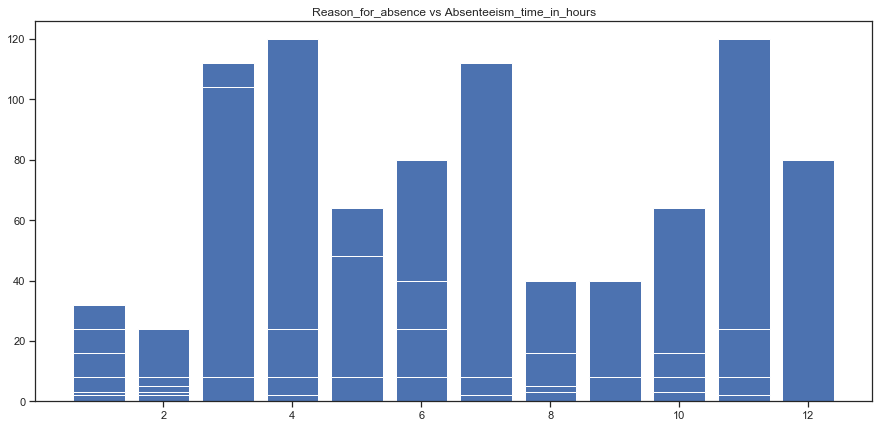

In [63]:

plt.figure(figsize=(15,7))
plt.title('Reason_for_absence vs Absenteeism_time_in_hours')
plt.bar(data['Month_of_absence'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

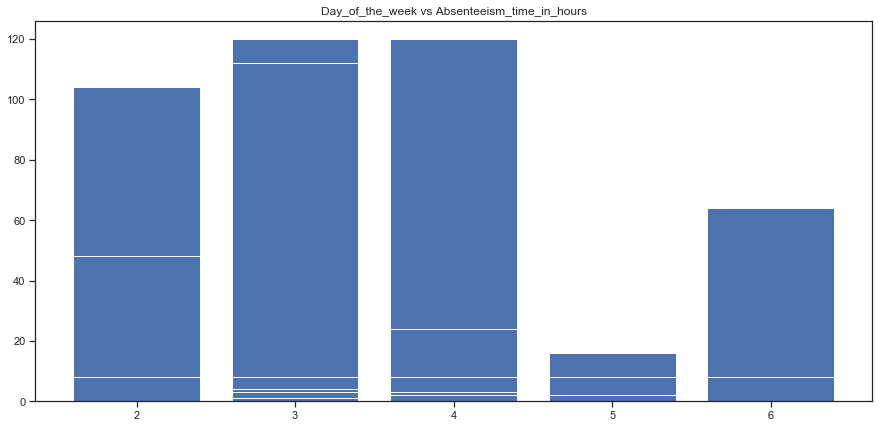

In [64]:

plt.figure(figsize=(15,7))
plt.title('Day_of_the_week vs Absenteeism_time_in_hours')
plt.bar(data['Day_of_the_week'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

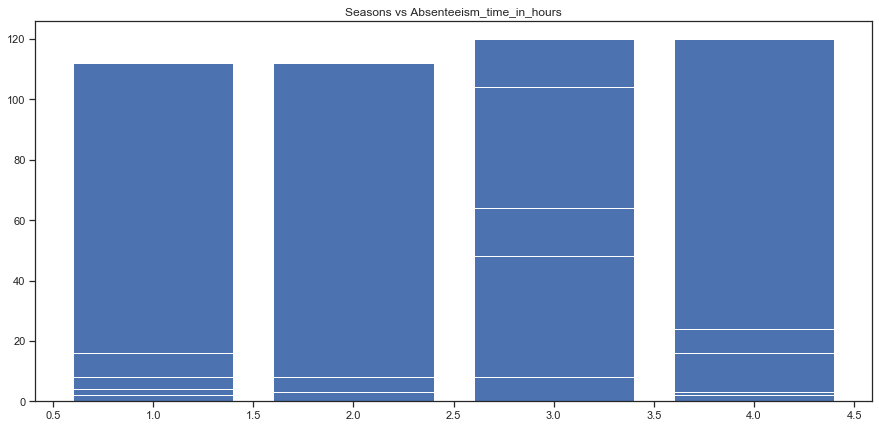

In [65]:

plt.figure(figsize=(15,7))
plt.title('Seasons vs Absenteeism_time_in_hours')
plt.bar(data['Seasons'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

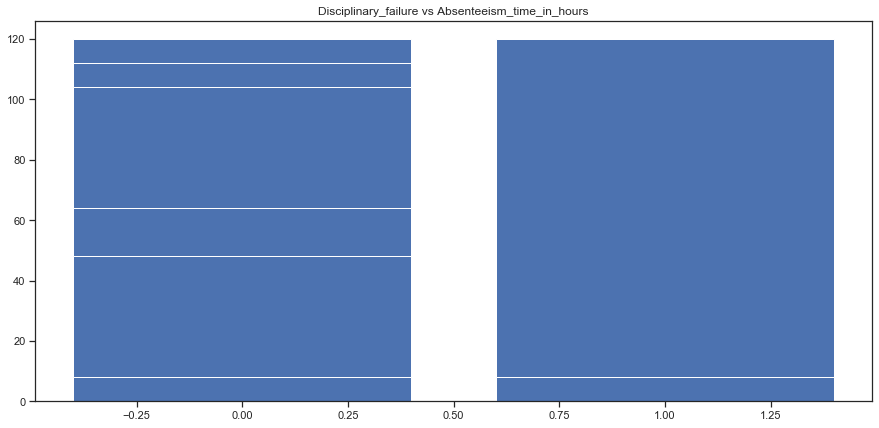

In [66]:

plt.figure(figsize=(15,7))
plt.title('Disciplinary_failure vs Absenteeism_time_in_hours')
plt.bar(data['Disciplinary_failure'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

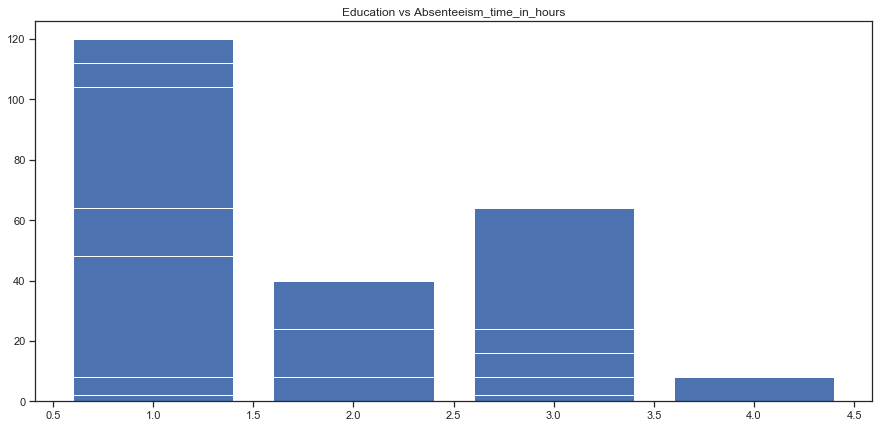

In [67]:

plt.figure(figsize=(15,7))
plt.title('Education vs Absenteeism_time_in_hours')
plt.bar(data['Education'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

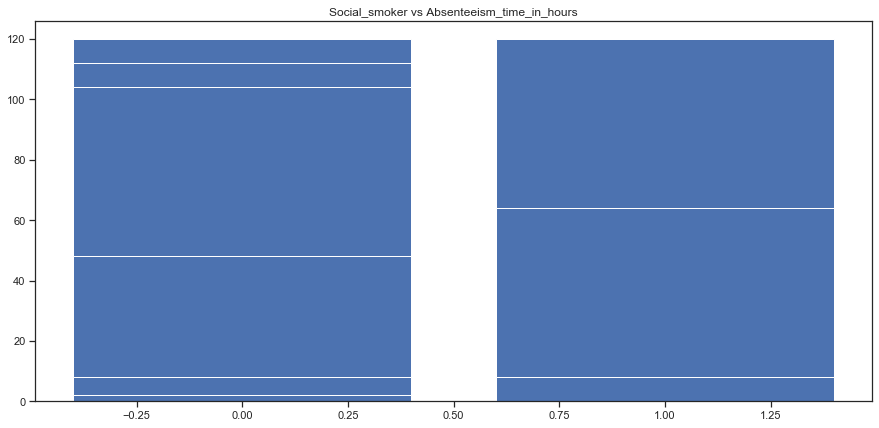

In [68]:

plt.figure(figsize=(15,7))
plt.title('Social_smoker vs Absenteeism_time_in_hours')
plt.bar(data['Social_smoker'], data['Absenteeism_time_in_hours'])


<BarContainer object of 673 artists>

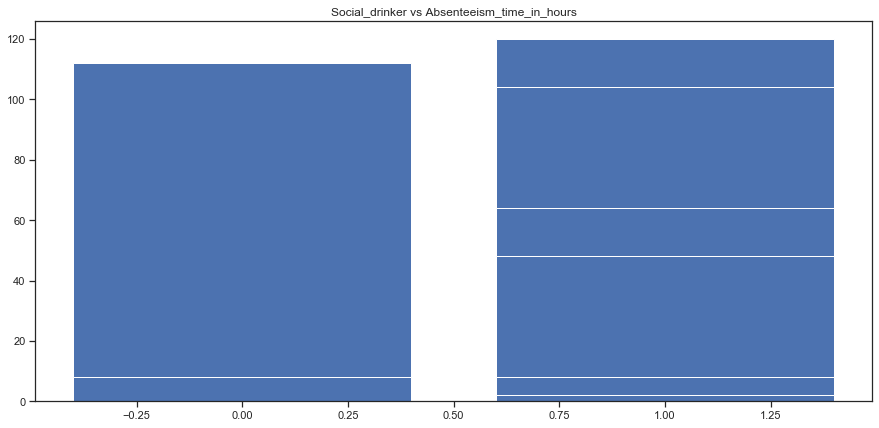

In [69]:

plt.figure(figsize=(15,7))
plt.title('Social_drinker vs Absenteeism_time_in_hours')
plt.bar(data['Social_drinker'], data['Absenteeism_time_in_hours'])


# Feature Selection

[]

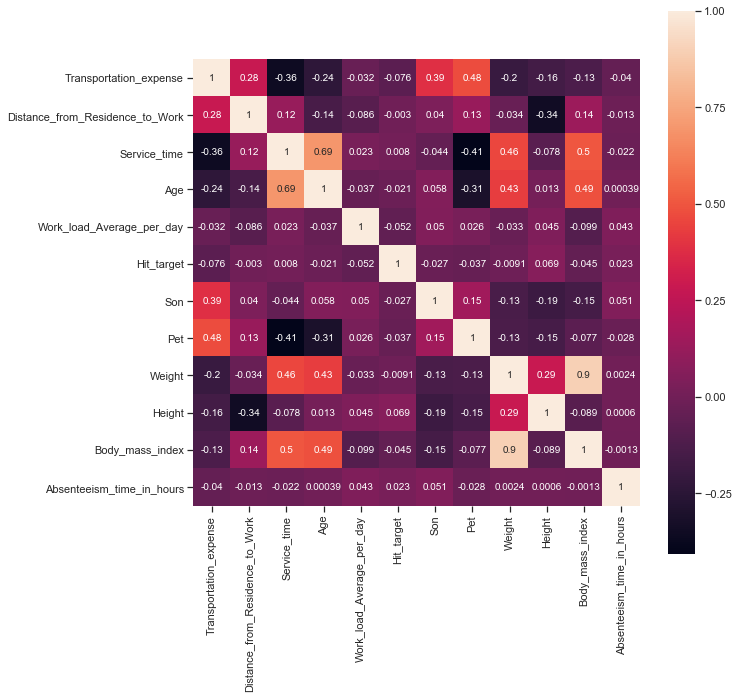

In [70]:
# Set the width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

# Generate correlation matrix
corr = data.loc[:, continuous_col].corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),
           square=True, ax=ax, annot=True)

plt.plot()

In [71]:
# Anova Test
formula = 'Absenteeism_time_in_hours~Reason_for_absence+Month_of_absence+Day_of_the_week+Seasons+Disciplinary_failure+Education+Social_drinker+Social_smoker'
anova_model = ols(formula, data=data).fit()
anova_table = anova_lm(anova_model, type=2)
print(anova_table)

                         df        sum_sq      mean_sq          F        PR(>F)
Reason_for_absence      1.0   7846.024174  7846.024174  53.731597  6.702537e-13
Month_of_absence        1.0     23.391380    23.391380   0.160190  6.891102e-01
Day_of_the_week         1.0    693.390465   693.390465   4.748517  2.967436e-02
Seasons                 1.0     47.409975    47.409975   0.324676  5.690039e-01
Disciplinary_failure    1.0   2597.679998  2597.679998  17.789583  2.809916e-05
Education               1.0    530.857126   530.857126   3.635447  5.699278e-02
Social_drinker          1.0    922.837463   922.837463   6.319829  1.217495e-02
Social_smoker           1.0    172.861650   172.861650   1.183801  2.769783e-01
Residual              664.0  96958.965304   146.022538        NaN           NaN


In [72]:
data = data.drop(['Weight'], axis=1)
continuous_col.remove('Weight')

# Feature Scaling

In [73]:
continuous_col_wo_target = ['Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age',
                            'Work_load_Average_per_day', 'Hit_target', 'Height', 'Body_mass_index']
print(continuous_col_wo_target)

['Transportation_expense', 'Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_per_day', 'Hit_target', 'Height', 'Body_mass_index']


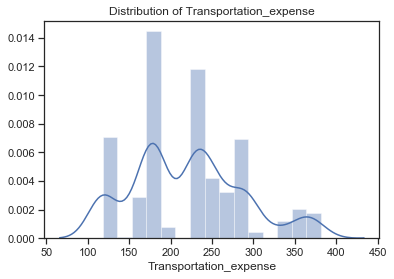

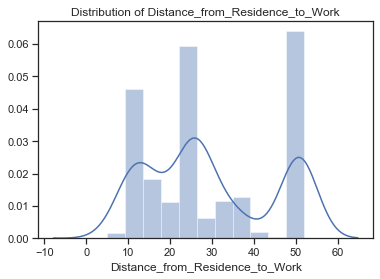

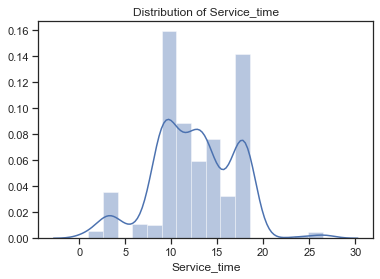

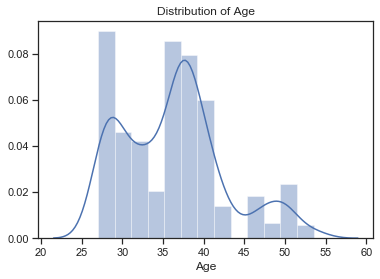

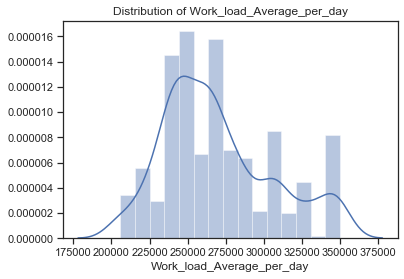

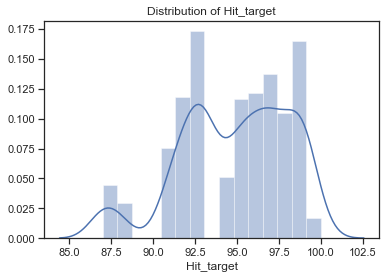

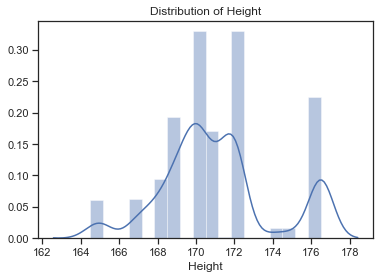

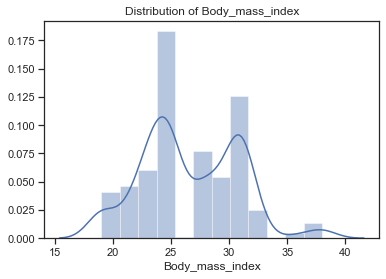

In [74]:
# Checking distribution of the data

for col in continuous_col_wo_target:
    sns.distplot(data[col], bins = 'auto')
    plt.title("Distribution of "+str(col))
    plt.show()

##### There are no normally distributed columns

In [75]:
# Normalization
for i in continuous_col_wo_target:
    data[i] = (data[i] - data[i].min())/(data[i].max() - data[i].min())
    print(i)

Transportation_expense
Distance_from_Residence_to_Work
Service_time
Age
Work_load_Average_per_day
Hit_target
Height
Body_mass_index


# Model Building

In [76]:
# Splitting data into train and test
features = data.iloc[:,data.columns != 'Absenteeism_time_in_hours']
target = data['Absenteeism_time_in_hours']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [77]:
# Creating function to return evaluation metrics

def metrics(t, p):
    mae = mean_absolute_error(t,p)
    mse = mean_squared_error(t, p)
    rmse = np.sqrt(mean_squared_error(t,p))
    rsqr = r2_score(t,p)
    accuracy = 100 - rmse
    
    print('RMSE      :',rmse)
    print('MSE       :',mse)
    print('MAE       :',mae)
    print('R²        :',rsqr)
    print('Accuracy  : {} %'.format(accuracy))
    


### KNN Algorithm

In [78]:

knn_model = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
metrics(y_test, knn_predict)

RMSE      : 14.18716744683762
MSE       : 201.27572016460908
MAE       : 5.318518518518519
R²        : -0.026852547529283788
Accuracy  : 85.81283255316238 %


### Decision Tree

In [79]:
dt_model = DecisionTreeRegressor(max_depth=2).fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
metrics(y_test, dt_predict)

RMSE      : 14.063001251951396
MSE       : 197.76800421238653
MAE       : 6.483301191980753
R²        : -0.008957159756714406
Accuracy  : 85.93699874804861 %


### Random Forest

In [80]:
rf_model = RandomForestRegressor(n_estimators=500).fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)
metrics(y_test, rf_predict)

RMSE      : 14.561513921089183
MSE       : 212.03768767407408
MAE       : 6.080518518518518
R²        : -0.0817571020601715
Accuracy  : 85.43848607891081 %


### Linear Regression

In [81]:
lin_reg_model = LinearRegression().fit(x_train, y_train)
lin_reg_predict = lin_reg_model.predict(x_test)
metrics(y_test, lin_reg_predict)

RMSE      : 14.024899884793811
MSE       : 196.69781677848945
MAE       : 6.3717766178602995
R²        : -0.0034973621619904804
Accuracy  : 85.97510011520619 %


### Gradient Boosting

In [ ]:
gb_model = GradientBoostingRegressor().fit(x_train, y_train)
gb_predict = gb_model.predict(x_test)
metrics(y_test, gb_predict)

In [ ]:
data.head()


In [ ]:
absenteeism_monthly = data.groupby("Month_of_absence")['Absenteeism_time_in_hours'].sum()
absenteeism_monthly = absenteeism_monthly.reset_index()
print(absenteeism_monthly)

In [ ]:
# As the data of 3 years, We should divide Absenteeism_time_in_hours by 3 for every month

absenteeism_monthly['Absenteeism_hours_by_months'] = absenteeism_monthly['Absenteeism_time_in_hours']/3
absenteeism_monthly['Month_of_absence'] = absenteeism_monthly['Month_of_absence'].astype('int')
print(absenteeism_monthly)

In [ ]:
absenteeism_monthly = absenteeism_monthly.drop(['Absenteeism_time_in_hours'], axis = 1)
absenteeism_monthly = absenteeism_monthly.set_index('Month_of_absence')
time_series = absenteeism_monthly['Absenteeism_hours_by_months']
print(time_series)

In [ ]:
# Now lets plot absence hours by month
plt.figure(figsize=(15,7))
plt.plot(time_series)

#### Checking if time series is stationary
That means mean, variance and covariance is constant over period of time

In [ ]:
plot_acf(time_series)

In [ ]:
df_test = adfuller(time_series, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

##### From the result above we can say that the time series is not stationary because Test Statistics is greater than Critical Value for  1%, 5%, 10% 

In [ ]:
time_series_log = np.log(time_series)

In [ ]:
plt.plot(time_series_log)

In [ ]:
time_series_diff = time_series_log - time_series_log.shift()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(time_series_diff)
print(time_series_diff)

In [ ]:
time_series_diff.fillna(0,inplace=True)
df_test = adfuller(time_series_diff)
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

##### From the result above we can say that the time series is not stationary because Test Statistics is greater than Critical Value for  1%, 5%, 10% 

In [ ]:
time_series_diff1 = time_series_diff - time_series_diff.shift()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(time_series_diff1)
print(time_series_diff1)

In [ ]:
time_series_diff1.fillna(0,inplace=True)
df_test = adfuller(time_series_diff1, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

In [ ]:
time_series_diff2 = time_series_diff1 - time_series_diff1.shift()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(time_series_diff2)
print(time_series_diff2)

In [ ]:
time_series_diff2.fillna(0,inplace=True)
df_test = adfuller(time_series_diff2, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

##### Now the Time Series is stationary because Test Statistics is lesser than Critical Vaue for 10% and 5%


#### Ploting ACF and PACF plots
- ACF -> Auto-correlation funtion
- PACF -> Partial auto-correlation function

In [ ]:
acf_plot = acf(time_series_diff2, nlags=10)
pacf_plot = pacf(time_series_diff2, nlags=10, method='ols')

In [ ]:
# ACF plot
plt.figure(figsize=(20, 7))
plt.subplot(121) 
plt.plot(acf_plot)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series_diff2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

In [ ]:
# PACF plot
plt.figure(figsize=(20, 7))
plt.subplot(121) 
plt.plot(pacf_plot)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series_diff2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

In [ ]:
# Checking for best pdq value

p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
print(pdq)

In [ ]:
for param in pdq:
    try:
        model_arima = ARIMA(time_series_diff2,order=param)
        model_arima_fit = model_arima.fit()
        RSS = (model_arima_fit.fittedvalues-time_series_diff2)**2
        RSS.fillna(0,inplace=True)
        print(param, model_arima_fit.aic)
        print("RSS", sum(RSS))
        print("\n")
    except:
        continue

pdq value of (3,0,4) gives least value for RSS. So we will use (3,0,4) as the parameters for ARIMA model

In [ ]:
model_arima = ARIMA(time_series_diff2, order=(3,0,4))
model_arima_fit = model_arima.fit()
model_arima_fit.fittedvalues
print(model_arima_fit.aic)

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(time_series_diff2)
plt.plot(model_arima_fit.fittedvalues, color='red')

In [ ]:
# Prediction
predictions = model_arima_fit.predict(start = 12, end = 24)
print(predictions)

Removing 12 because it belongs to previous year

In [ ]:
predictions_ARIMA = predictions[1:]
print(predictions_ARIMA)

In [ ]:
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()
print(time_series_diff2)
print(predictions_ARIMA_cumsum)

In [ ]:
predictions_ARIMA_log = pd.Series(4.8, index=range(13,25))
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value=0)

In [ ]:
sum(time_series_log)/12

In [ ]:
predictions_ARIMA_log

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
print(predictions_ARIMA)

In [ ]:
# Plotting Time Series and Prediction
plt.figure(figsize=(15,7))
plt.plot(time_series)
plt.plot(predictions_ARIMA, color='red')

In [ ]:
predictions_ARIMA.mean()